Remember to put in the the file for the YELP dataset before running.

# Processing

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers , activations , models , preprocessing , utils
import tensorflow as tf
from  sklearn.model_selection import train_test_split

In [ ]:
#doc du lieu ve dang data-label
data=[]
label=[]
error=0
with open('yelp_labelled.csv','r') as f:
    for line in f:
        part = line.strip().strip(',').split(',')
        if len(part)<=1:
            error+=1
            continue
        if part[-1]!='0' and part[-1]!='1':
            error+=1
            continue
        data.append(", ".join(part[:-1]))
        label.append(int(part[-1]))
print('Read',len(data),'items, skiped',error,'error lines')
print('Label 0:',len(label)-sum(label),'Label 1:',sum(label))

Read 992 items, skiped 8 error lines
Label 0: 496 Label 1: 496


In [ ]:
print(data[:5])
print(label[:5])

['Wow... Loved this place.', 'Crust is not good.', 'Not tasty and the texture was just nasty.', 'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.', 'The selection on the menu was great and so were the prices.']
[1, 0, 0, 1, 1]


In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(lower=True,split=' ')
tokenizer.fit_on_texts(data)
X = tokenizer.texts_to_sequences(data)
X = pad_sequences(X)
print(X[:5])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0 424 164   8  15]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0 582   7  12  16]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0  12 149   2   1 425   4  45 426]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 583
   73 289   1 584 290 893 894 180 895 896 427   2 164   9]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   1 165  35   1 109   4  22   2  26  27   1 166]]


In [ ]:
print("input shape",X.shape)
n_vocab=len(tokenizer.word_index)+1
print('Vocab count',n_vocab)

input shape (992, 32)
Vocab count 2054


In [ ]:
print(n_vocab)
print(X.shape[1])

2054
32


# LTSM

In [ ]:
embed_dim = 128
hidden_size = 200
batch_size = 32

model = models.Sequential()
model.add(layers.Embedding(n_vocab, embed_dim, input_length = X.shape[1]))
#model.add(layers.LSTM(hidden_size,return_sequences = True))
model.add(layers.LSTM(hidden_size))
model.add(layers.Dense(128,activation='sigmoid'))
model.add(layers.Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 32, 128)           262912    
                                                                 
 lstm (LSTM)                 (None, 200)               263200    
                                                                 
 dense (Dense)               (None, 128)               25728     
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 552,098
Trainable params: 552,098
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#tách train test
Y = tf.keras.utils.to_categorical(label)
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size = 0.25, random_state = 36)

In [ ]:
history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = 10, verbose = 1, validation_split=0.1)

Epoch 1/10
21/21 [==============================] - 11s 195ms/step - loss: 0.6996 - accuracy: 0.5336 - val_loss: 0.6841 - val_accuracy: 0.5333
Epoch 2/10
21/21 [==============================] - 2s 110ms/step - loss: 0.6438 - accuracy: 0.6592 - val_loss: 0.5070 - val_accuracy: 0.7867
Epoch 3/10
21/21 [==============================] - 1s 53ms/step - loss: 0.3991 - accuracy: 0.8490 - val_loss: 0.4296 - val_accuracy: 0.8133
Epoch 4/10
21/21 [==============================] - 1s 59ms/step - loss: 0.1338 - accuracy: 0.9626 - val_loss: 0.4676 - val_accuracy: 0.8133
Epoch 5/10
21/21 [==============================] - 1s 37ms/step - loss: 0.0912 - accuracy: 0.9776 - val_loss: 0.4634 - val_accuracy: 0.8533
Epoch 6/10
21/21 [==============================] - 0s 15ms/step - loss: 0.0713 - accuracy: 0.9880 - val_loss: 0.5681 - val_accuracy: 0.7867
Epoch 7/10
21/21 [==============================] - 1s 23ms/step - loss: 0.0299 - accuracy: 0.9970 - val_loss: 0.6257 - val_accuracy: 0.8000
Epoch 8/10

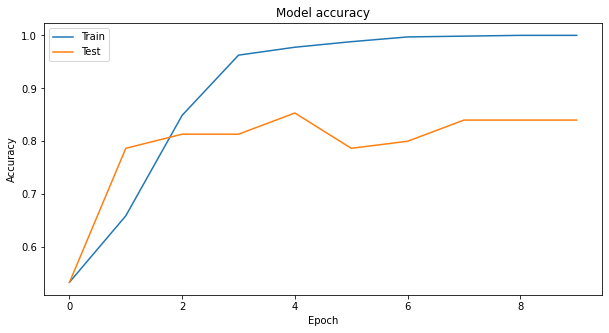

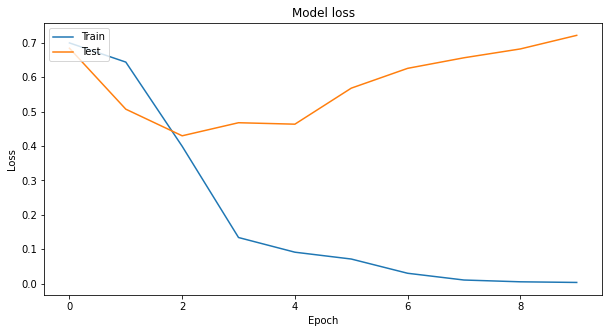

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 5)
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
#test
preds = model.predict(X_valid, verbose = 1)

8/8 [==============================] - 0s 3ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np
#show result scores
predict_labels = preds.argmax(axis=-1)
true_labels=Y_valid.argmax(axis=-1)
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(true_labels, predict_labels)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(true_labels, predict_labels)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(true_labels, predict_labels)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(true_labels, predict_labels)
print('F1 score: %f' % f1)
predict_labels=np.append(predict_labels,1)
yhat4 = tf.keras.utils.to_categorical(predict_labels)
predict_labels=predict_labels[:-1]
yhat4=yhat4[:-1]
real = tf.keras.utils.to_categorical(true_labels)
print("\n".join(classification_report(real, yhat4).split('\n')[:4]))


Accuracy: 0.782258
Precision: 0.780488
Recall: 0.780488
F1 score: 0.780488
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       125
           1       0.78      0.78      0.78       123


# RNN

In [19]:
embed_dim = 128
hidden_size = 200
batch_size = 32

model = models.Sequential()
model.add(layers.Embedding(n_vocab, embed_dim, input_length = X.shape[1]))
model.add(layers.SimpleRNN(hidden_size))
model.add(layers.Dense(128,activation='sigmoid'))
model.add(layers.Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 32, 128)           262912    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 200)               65800     
                                                                 
 dense_4 (Dense)             (None, 128)               25728     
                                                                 
 dense_5 (Dense)             (None, 2)                 258       
                                                                 
Total params: 354,698
Trainable params: 354,698
Non-trainable params: 0
_________________________________________________________________
None


In [20]:
#tách train test
Y = tf.keras.utils.to_categorical(label)
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size = 0.25, random_state = 36)

In [21]:
history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = 10, verbose = 1, validation_split=0.1)

Epoch 1/10
21/21 [==============================] - 6s 165ms/step - loss: 0.6965 - accuracy: 0.5411 - val_loss: 0.7375 - val_accuracy: 0.4667
Epoch 2/10
21/21 [==============================] - 2s 69ms/step - loss: 0.6159 - accuracy: 0.6712 - val_loss: 0.7185 - val_accuracy: 0.4400
Epoch 3/10
21/21 [==============================] - 2s 90ms/step - loss: 0.3404 - accuracy: 0.8969 - val_loss: 1.0332 - val_accuracy: 0.4667
Epoch 4/10
21/21 [==============================] - 2s 91ms/step - loss: 0.1766 - accuracy: 0.9342 - val_loss: 1.3661 - val_accuracy: 0.4267
Epoch 5/10
21/21 [==============================] - 2s 78ms/step - loss: 0.1130 - accuracy: 0.9626 - val_loss: 1.1112 - val_accuracy: 0.4533
Epoch 6/10
21/21 [==============================] - 1s 56ms/step - loss: 0.0495 - accuracy: 0.9970 - val_loss: 1.3906 - val_accuracy: 0.5200
Epoch 7/10
21/21 [==============================] - 2s 96ms/step - loss: 0.0245 - accuracy: 0.9925 - val_loss: 1.4859 - val_accuracy: 0.4533
Epoch 8/10
2

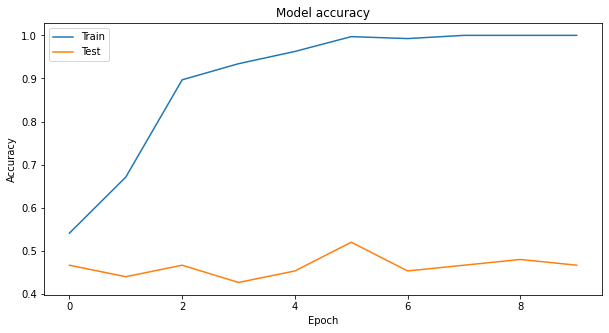

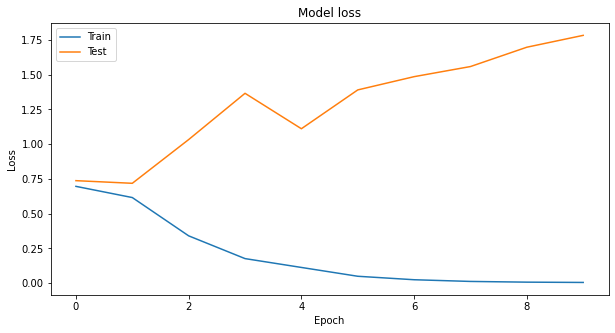

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 5)
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [23]:
#test
preds = model.predict(X_valid, verbose = 1)

8/8 [==============================] - 0s 5ms/step


In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np
#show result scores
predict_labels = preds.argmax(axis=-1)
true_labels=Y_valid.argmax(axis=-1)
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(true_labels, predict_labels)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(true_labels, predict_labels)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(true_labels, predict_labels)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(true_labels, predict_labels)
print('F1 score: %f' % f1)
predict_labels=np.append(predict_labels,1)
yhat4 = tf.keras.utils.to_categorical(predict_labels)
predict_labels=predict_labels[:-1]
yhat4=yhat4[:-1]
real = tf.keras.utils.to_categorical(true_labels)
print("\n".join(classification_report(real, yhat4).split('\n')[:4]))


Accuracy: 0.560484
Precision: 0.554688
Recall: 0.577236
F1 score: 0.565737
              precision    recall  f1-score   support

           0       0.57      0.54      0.56       125
           1       0.55      0.58      0.57       123
